# Walk around

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 14](https://img.shields.io/badge/Jump%20to-Level%2014-blue?style=flat-square)](http://www.pythonchallenge.com/pc/return/italy.html)

<center>
    <img src="../../resources/imgs/Quiz14-1.png" />
    <br />
    <br />
    <img src="../../resources/imgs/Quiz14-2.png" style="width: 100px; height: 100px;" />
</center>

&emsp;&emsp;上面的大图是一块**面包螺**，由外向内顺时针缠绕，而下方的方形图是一张$10000\times1$的细线，在CSS样式的约束下像看上去有点像条形码。看看网页源代码有没有其他的提示。

In [1]:
from requests import post
from bs4 import BeautifulSoup

In [2]:
response = post(
    'http://www.pythonchallenge.com/pc/return/italy.html',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
response = BeautifulSoup(response.text, features='html')
print(response.prettify())

<html>
 <head>
  <title>
   walk around
  </title>
  <link href="../style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <center>
   <img src="italy.jpg"/>
   <br/>
   <br/>
   <!-- remember: 100*100 = (100+99+99+98) + (...  -->
   <img height="100" src="wire.png" width="100"/>
  </center>
 </body>
</html>



&emsp;&emsp;第13行的提示$100\times100=(100+99+99+98)+\cdots$非常重要，它和图1对应，告诉我们图2的缠绕规则。

In [3]:
from PIL import Image
from io import BytesIO

In [4]:
# 爬取原始图片
response = post(
    'http://www.pythonchallenge.com/pc/return/wire.png',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
picture = Image.open(BytesIO(response.content))
result = Image.new(picture.mode, (100, 100))

# 缠绕方向
direction = [(1, 0), (0, 1), (-1, 0), (0, -1)]
# 绕线起点
(x, y) = (-1, 0)
# 线定位标记
k = 0
# 步长（用于匹配绕线规律）
steps = 200

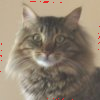

In [5]:
# 只要还有步长，图就没有绕完
while steps / 2 > 0:
    # 四个方向绕一圈
    for vector in direction:
        # 整除以获得实际步长（这下就和绕线规律一样了）
        step = steps // 2
        for i in range(step):
            # 沿着方向前进
            x += vector[0]
            y += vector[1]
            # 将像素点放置到图片上
            result.putpixel((x, y), picture.getpixel((k, 0)))
            k += 1
        steps -= 1
# 像素线已经缠绕成图片了，奇迹显现吧！
display(result)

&emsp;&emsp;现在，我们得到了一只猫，所以下一关链接为<http://www.pythonchallenge.com/pc/return/cat.html>。